# Find anomaly in a single time series using `matrixprofile`

More on matrixprofile: https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90

In [1]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

BASE_PATH = '../data-sets/KDD-Cup/data/'

In [2]:
df = pd.read_csv(BASE_PATH + '005_UCR_Anomaly_4000.txt', names=['series'])
fig = plt.Figure(figsize=(500,50), dpi= 100)
display(df.plot())

In [5]:
#importing the required libraries
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import matrixprofile as mp
from matrixprofile import *

df=pd.read_csv(BASE_PATH + '005_UCR_Anomaly_4000.txt', names=['values'])
#set window size
window_size=100
#calculating the matrix profile with window size'4'
profile = mp.compute(df['values'].values, window_size)
# discover motifs
# profile = mp.discover.motifs(profile, k=window_size)
# discover discords
profile = mp.discover.discords(profile)

Discord: 5299, 6.067739097090298
Discord: 5300, 6.059512363260332
Discord: 5298, 6.053728498618455


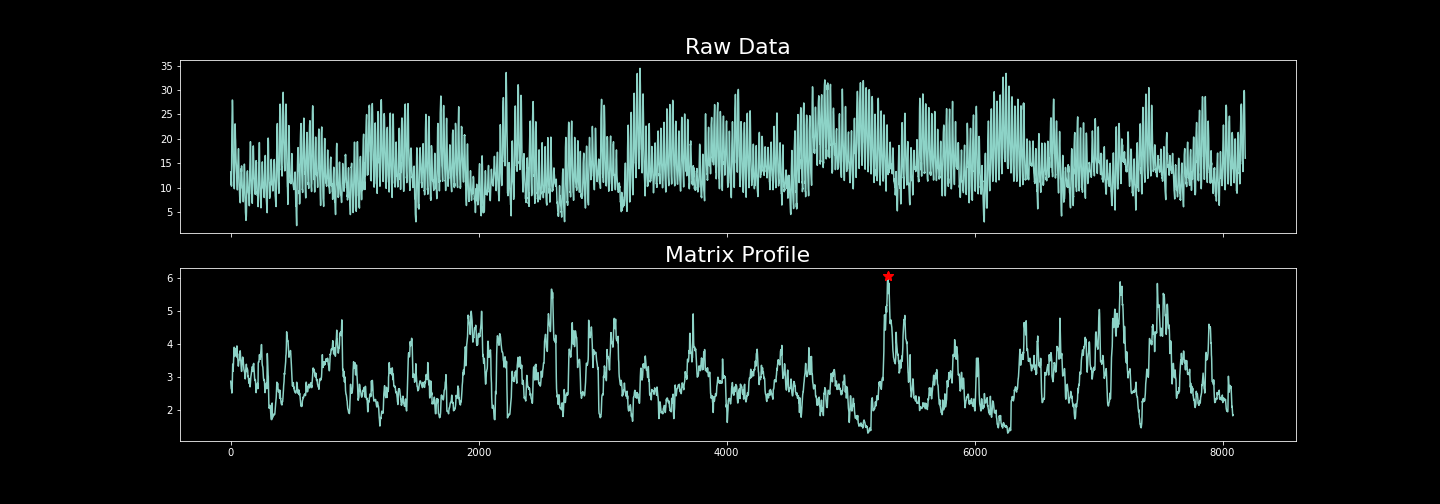

In [6]:
# We have to adjust the matrix profile to match the dimensions of the original time series
mp_adjusted = np.append(profile['mp'], np.zeros(profile['w'] - 1) + np.nan)

# Create a plot with three subplots
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,7))
axes[0].plot(np.arange(len(profile['data']['ts'])), profile['data']['ts'])
axes[0].set_title('Raw Data', size=22)

#Plot the Matrix Profile
axes[1].plot(np.arange(len(mp_adjusted)), mp_adjusted)
axes[1].set_title('Matrix Profile', size=22)

for discord in profile['discords']:
    x = discord
    y = profile['mp'][discord]

    print(f'Discord: {x}, {y}')

    axes[1].plot(x, y, marker='*', markersize=10, c='r')

plt.show()